In [1]:
import numpy as np
import pandas as pd
from collections import Counter, defaultdict
import matplotlib.pyplot as plt

dataset = pd.read_csv('startup_funding.csv')
dataset.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


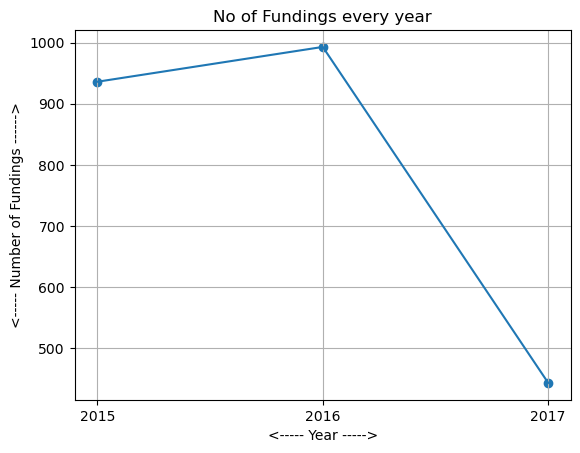

2015 936
2016 993
2017 443


In [2]:
years = [int(date[-4:]) for date in dataset['Date']]
no_of_Funding_Each_Year = [(year, no_of_investments) for year, no_of_investments in Counter(years).items()]

no_of_Funding_Each_Year.sort()
no_of_Funding_Each_Year = np.array(no_of_Funding_Each_Year, dtype = int)

years = no_of_Funding_Each_Year[:, 0]
no_of_Fundings = no_of_Funding_Each_Year[:, 1]

plt.scatter(years, no_of_Fundings)
plt.xticks(np.arange(2015, 2018, 1))
plt.plot(years, no_of_Fundings)
plt.grid()
plt.ylabel('<----- Number of Fundings ------>', fontsize = 10)
plt.xlabel('<----- Year ----->', fontsize = 10)
plt.title('No of Fundings every year')
plt.show()

for year, no_of_investments in no_of_Funding_Each_Year:
    print(year, no_of_investments)

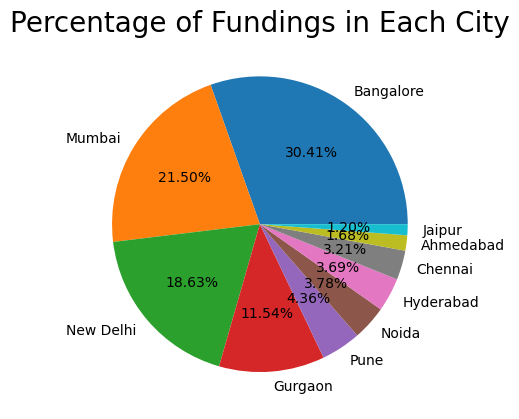

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


In [3]:
dataset.CityLocation.replace('Delhi', 'New Delhi', inplace = True)
dataset.CityLocation.replace('bangalore', 'Bangalore', inplace = True)
dataset.CityLocation.dropna(inplace = True)
cityLocation = dataset['CityLocation']
cities = list()

for city in cityLocation: 
    location = str(city).split('/')[0]
    if location[-1] == ' ': location = location[:-1]  
    if location != 'nan': cities.append(location)

no_of_Funding_City_Wise = [(city, no_of_investments) for city, no_of_investments in Counter(cities).items()]
no_of_Funding_City_Wise.sort(reverse=True, key=lambda x: x[1])

no_of_Funding_City_Wise = np.array(no_of_Funding_City_Wise)
cities = no_of_Funding_City_Wise[:, 0]
no_of_Fundings = np.array(no_of_Funding_City_Wise[:, 1], dtype = int)

plt.pie(no_of_Fundings[:10], labels = cities[:10], autopct='%1.2f%%')
plt.title('Percentage of Fundings in Each City', fontsize = 20)
plt.show()

for city, no_of_investments in no_of_Funding_City_Wise[:10]:
    print(city, no_of_investments)

Bangalore 49.71
New Delhi 16.63
Mumbai 13.90
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


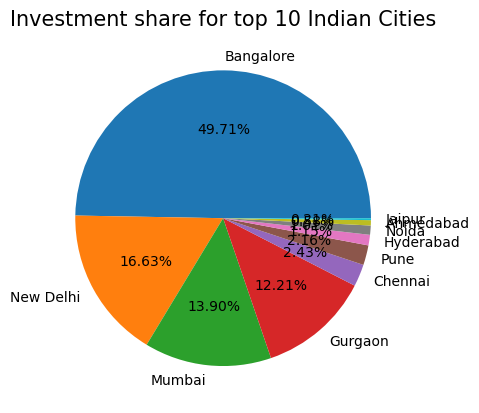

In [4]:
dataset['AmountInUSD'].replace(np.NaN, '0', inplace = True)
cityLocation = dataset['CityLocation']
amountInUSD = dataset['AmountInUSD']
cities, amounts = list(), list()

for index in range(len(cityLocation)): 
    location = str(cityLocation[index]).split('/')[0]
    if location[-1] == ' ': location = location[:-1]  
    if location != 'nan': 
        cities.append(location)
        amounts.append(int(str(amountInUSD[index]).replace(',','')))
        
amount_Invested_City_Wise = defaultdict(int)
for index in range(len(cities)):
    amount_Invested_City_Wise[cities[index]] += amounts[index]
        
amount_Invested_City_Wise = list(amount_Invested_City_Wise.items())
amount_Invested_City_Wise.sort(reverse = True, key = lambda x: x[1])

amount_Invested_City_Wise = np.array(amount_Invested_City_Wise)
cities = amount_Invested_City_Wise[:10, 0]
amount_Invested = np.array(amount_Invested_City_Wise[:10, 1], dtype = int)
total_Investment = np.sum(amount_Invested)

for city, amount in zip(cities, amount_Invested):
    print(city, '{:.2f}'.format(amount/total_Investment * 100))
    
plt.pie(amount_Invested, autopct = '%.2f%%', labels = cities)
plt.title('Investment share for top 10 Indian Cities', fontsize = 15)
plt.show()

Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00


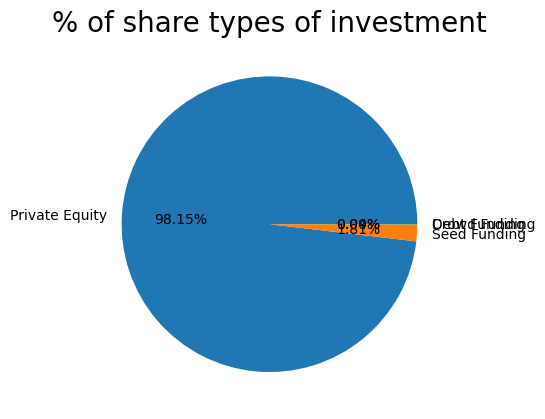

In [12]:
dataset.InvestmentType.replace(np.nan, 'nan', inplace = True)
dataset.InvestmentType.replace('Crowd funding', 'Crowd Funding', inplace = True)
dataset.InvestmentType.replace('PrivateEquity', 'Private Equity', inplace = True)
dataset.InvestmentType.replace('SeedFunding', 'Seed Funding', inplace = True)

investmentType = dataset.InvestmentType[dataset.InvestmentType != 'nan']
amountInUSD = dataset.AmountInUSD[dataset.InvestmentType != 'nan']
amountInUSD = np.array([amount.replace(',', '') for amount in amountInUSD], dtype = int)
total_Amount = np.sum(amountInUSD)

amount_As_Per_Type = defaultdict(int)
for amount, itype in zip(amountInUSD, investmentType): amount_As_Per_Type[itype] += amount
for itype, amount in amount_As_Per_Type.items():
    print(itype, '{:.2f}'.format(amount/total_Amount * 100))

plt.pie(amount_As_Per_Type.values(), autopct = '%.2f%%', labels = amount_As_Per_Type.keys())
plt.title('% of share types of investment', fontsize = 20)
plt.show()

Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


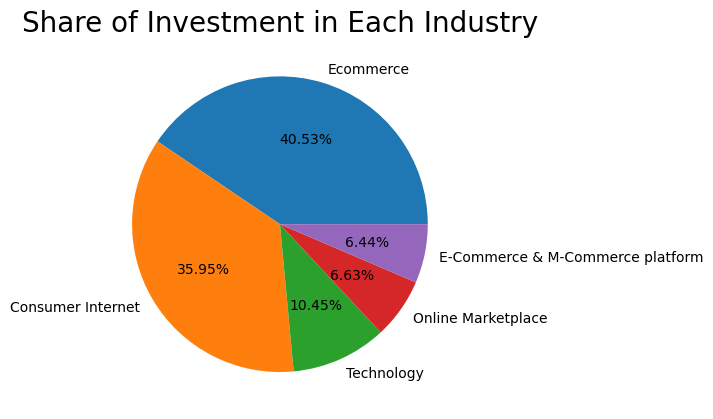

In [22]:
dataset.IndustryVertical.replace('eCommerce', 'Ecommerce', inplace = True)
dataset.IndustryVertical.replace('ecommerce', 'Ecommerce', inplace = True)
dataset.IndustryVertical.replace('ECommerce', 'Ecommerce', inplace = True)
dataset.IndustryVertical.replace(np.nan, 'nan', inplace = True)

industryVertical = dataset.IndustryVertical[dataset.IndustryVertical != 'nan']
amountInUSD = dataset.AmountInUSD[dataset.IndustryVertical != 'nan']
amountInUSD = np.array([int(amount.replace(',','')) for amount in dataset.AmountInUSD], dtype = int)
amount_Industry_Wise = defaultdict(int)

for industry, amount in zip(industryVertical, amountInUSD):
    amount_Industry_Wise[industry] += amount

amount_Industry_Wise = list(amount_Industry_Wise.items())
amount_Industry_Wise.sort(reverse = True, key = lambda x: x[1])
amount_Industry_Wise = np.array(amount_Industry_Wise)

industries = amount_Industry_Wise[:5, 0]
amounts = np.array(amount_Industry_Wise[:5, 1], dtype = int)
total_Amount = np.sum(amounts)

for industry, amount in zip(industries, amounts):
    print(industry, '{:.2f}'.format(amount/total_Amount * 100))
    
plt.pie(amounts, autopct = '%.2f%%', labels = industries)
plt.title('Share of Investment in Each Industry', fontsize = 20)
plt.show()

Paytm
Flipkart
Ola
Snapdeal
Oyo


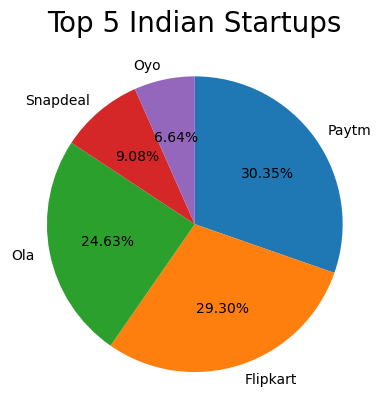

In [30]:
dataset.StartupName.replace('Flipkart.com', 'Flipkart', inplace = True)
dataset.StartupName.replace('Ola Cabs', 'Ola', inplace = True)
dataset.StartupName.replace('Olacabs', 'Ola', inplace = True)
dataset.StartupName.replace('Oyo Rooms', 'Oyo', inplace = True)
dataset.StartupName.replace('OyoRooms', 'Oyo', inplace = True)
dataset.StartupName.replace('Paytm Marketplace', 'Paytm', inplace = True)
dataset.StartupName.fillna('', inplace = True)

startupName = dataset.StartupName[dataset.StartupName != '']
amountInUSD = dataset.AmountInUSD[dataset.StartupName != '']
amountInUSD = np.array([int(amount.replace(',', '')) for amount in amountInUSD])
amount_Invested_Startup_Wise = defaultdict(int)

for startup, amount in zip(startupName, amountInUSD):
    amount_Invested_Startup_Wise[startup] += amount
    
amount_Invested_Startup_Wise = list(amount_Invested_Startup_Wise.items())
amount_Invested_Startup_Wise.sort(reverse = True, key = lambda x:x[1])
amount_Invested_Startup_Wise = np.array(amount_Invested_Startup_Wise)

startups = amount_Invested_Startup_Wise[:5, 0]
amounts = np.array(amount_Invested_Startup_Wise[:5, 1], dtype = int)
for startup in startups: print(startup)
    
plt.pie(amounts, labels = startups, autopct = '%.2f%%', counterclock = False, startangle = 90)
plt.title('Top 5 Indian Startups', fontsize = 20)
plt.show()

In [54]:
startupName = dataset.StartupName[dataset.StartupName != '']
startups_As_Per_Fundings = startupName.value_counts()

for index in range(5): 
    print(startups_As_Per_Fundings.index[index], startups_As_Per_Fundings.values[index]) 

Ola 9
Swiggy 7
UrbanClap 6
Paytm 6
Jugnoo 5


In [56]:
investors = list()
for investor in dataset['InvestorsName']:
    investors.extend(str(investor).split(','))

investors = [investor.strip() for investor in investors]
investors = [investor for investor in investors if investor != 'Undisclosed Investors' and investor != '']

no_of_Funding_Each_Investor = list(Counter(investors).items())

no_of_Funding_Each_Investor.sort(reverse=True, key=lambda x: x[1])
print(no_of_Funding_Each_Investor[0][0], no_of_Funding_Each_Investor[0][1])

Sequoia Capital 64
